# HR Insights - Exploratory Data Analysis

This notebook performs exploratory data analysis on the HR data.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [24]:
DATA_DIR = Path("../data/raw")

In [25]:
employee_files = list(DATA_DIR.glob("employee*.csv"))
if employee_files:
    employee_df = pd.read_csv(employee_files[0], sep='|', quotechar='"')
    print(f"Employee data shape: {employee_df.shape}")
    print(f"\nColumns: {list(employee_df.columns)}")
    employee_df.head()

Employee data shape: (50, 34)

Columns: ['client_employee_id', 'first_name', 'middle_name', 'last_name', 'preferred_name', 'job_code', 'job_title', 'job_start_date', 'organization_id', 'organization_name', 'department_id', 'department_name', 'dob', 'hire_date', 'recent_hire_date', 'anniversary_date', 'term_date', 'years_of_experience', 'work_email', 'address', 'city', 'state', 'zip', 'country', 'manager_employee_id', 'manager_employee_name', 'fte_status', 'is_per_deim', 'cell_phone', 'work_phone', 'scheduled_weekly_hour', 'active_status', 'termination_reason', 'clinical_level']


In [26]:
timesheet_files = list(DATA_DIR.glob("timesheet*.csv"))
if timesheet_files:
    timesheet_dfs = []
    for f in timesheet_files:
        df = pd.read_csv(f, sep='|', quotechar='"')
        timesheet_dfs.append(df)
    timesheet_df = pd.concat(timesheet_dfs, ignore_index=True)
    print(f"Timesheet data shape: {timesheet_df.shape}")
    print(f"\nColumns: {list(timesheet_df.columns)}")
    timesheet_df.head()

Timesheet data shape: (412571, 14)

Columns: ['client_employee_id', 'department_id', 'department_name', 'home_department_id', 'home_department_name', 'pay_code', 'punch_in_comment', 'punch_out_comment', 'hours_worked', 'punch_apply_date', 'punch_in_datetime', 'punch_out_datetime', 'scheduled_start_datetime', 'scheduled_end_datetime']


/var/folders/xx/nqv57ls513vcq63q5r9n5gzh0000gn/T/ipykernel_32833/4268973823.py:5: DtypeWarning: Columns (0: client_employee_id) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep='|', quotechar='"')


In [27]:
print("Employee Data Info:")
print(employee_df.info())
print("\n" + "="*50)
print("\nMissing values:")
print(employee_df.isnull().sum())

Employee Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_employee_id     50 non-null     int64  
 1   first_name             50 non-null     str    
 2   middle_name            0 non-null      float64
 3   last_name              50 non-null     str    
 4   preferred_name         50 non-null     str    
 5   job_code               50 non-null     int64  
 6   job_title              50 non-null     str    
 7   job_start_date         50 non-null     str    
 8   organization_id        50 non-null     str    
 9   organization_name      50 non-null     str    
 10  department_id          50 non-null     str    
 11  department_name        50 non-null     str    
 12  dob                    50 non-null     str    
 13  hire_date              50 non-null     str    
 14  recent_hire_date       50 non-null     str    
 15 

In [28]:
employee_df['active_status'] = employee_df['active_status'].astype(str)
status_counts = employee_df['active_status'].value_counts()
print("Employee Status Distribution:")
print(status_counts)

Employee Status Distribution:
active_status
1    44
0     6
Name: count, dtype: int64


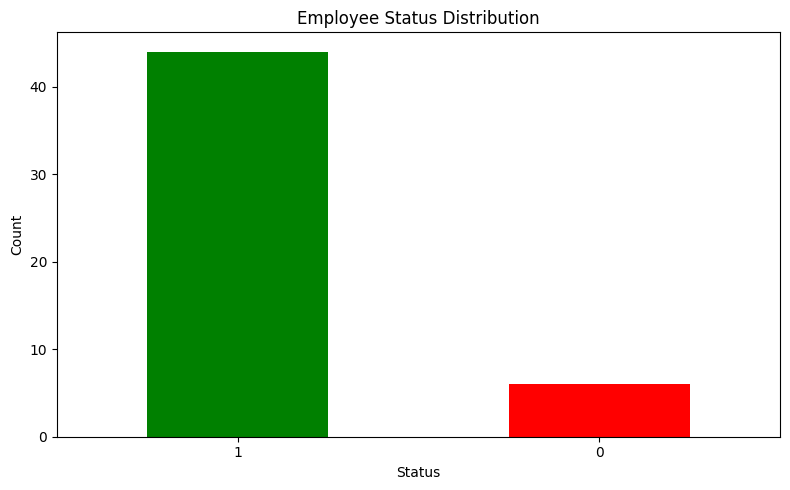

In [29]:
plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Employee Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
date_columns = ['hire_date', 'term_date', 'dob', 'job_start_date']
for col in date_columns:
    if col in employee_df.columns:
        employee_df[col] = pd.to_datetime(employee_df[col], errors='coerce')

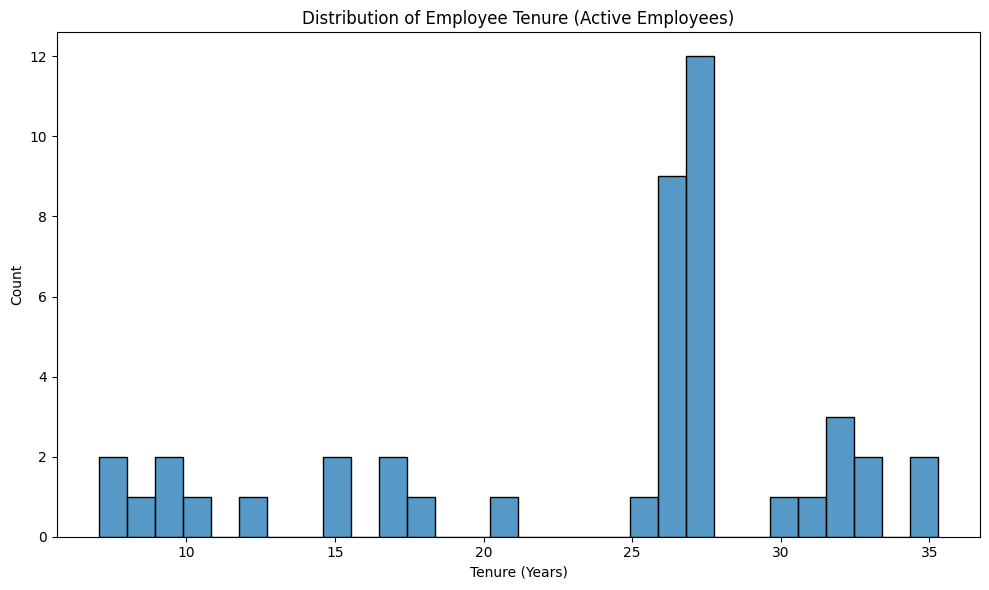


Average tenure: 23.93 years
Median tenure: 26.78 years


In [31]:
active_employees = employee_df[employee_df['active_status'] == '1'].copy()
active_employees['tenure_years'] = (pd.Timestamp.now() - active_employees['hire_date']).dt.days / 365

plt.figure(figsize=(10, 6))
sns.histplot(active_employees['tenure_years'], bins=30)
plt.title('Distribution of Employee Tenure (Active Employees)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(f"\nAverage tenure: {active_employees['tenure_years'].mean():.2f} years")
print(f"Median tenure: {active_employees['tenure_years'].median():.2f} years")

In [32]:
org_counts = employee_df['organization_name'].value_counts()
print("Employees by Organization:")
print(org_counts)

Employees by Organization:
organization_name
Care at Home               30
Lowell General Hospital    17
Tufts Medicine              3
Name: count, dtype: int64


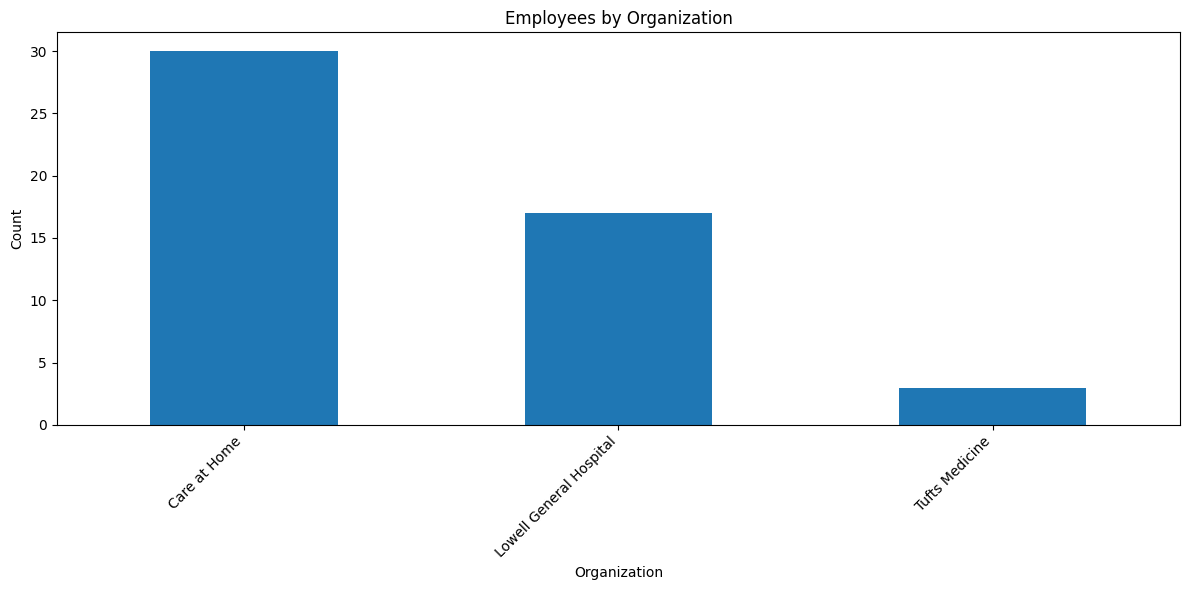

In [33]:
plt.figure(figsize=(12, 6))
org_counts.plot(kind='bar')
plt.title('Employees by Organization')
plt.xlabel('Organization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
job_counts = employee_df['job_title'].value_counts().head(15)
print("Top 15 Job Titles:")
print(job_counts)

Top 15 Job Titles:
job_title
Home Health Aide I                   6
Administrative Assistant II          3
Physical Therapy Assistant II        3
Physical Therapist - Care at Home    3
RN IV                                3
RN-Home Health-Case Manager          2
Manager, CT Scan                     1
Ultrasound Technologist III - PD     1
Nurse Assistant                      1
CT Technologist III                  1
Clinical Coordinator-RN              1
Unit Coordinator II                  1
Home Health Aide II - PD             1
Patient Access Coordinator I         1
Clinical Manager-Home Health         1
Name: count, dtype: int64


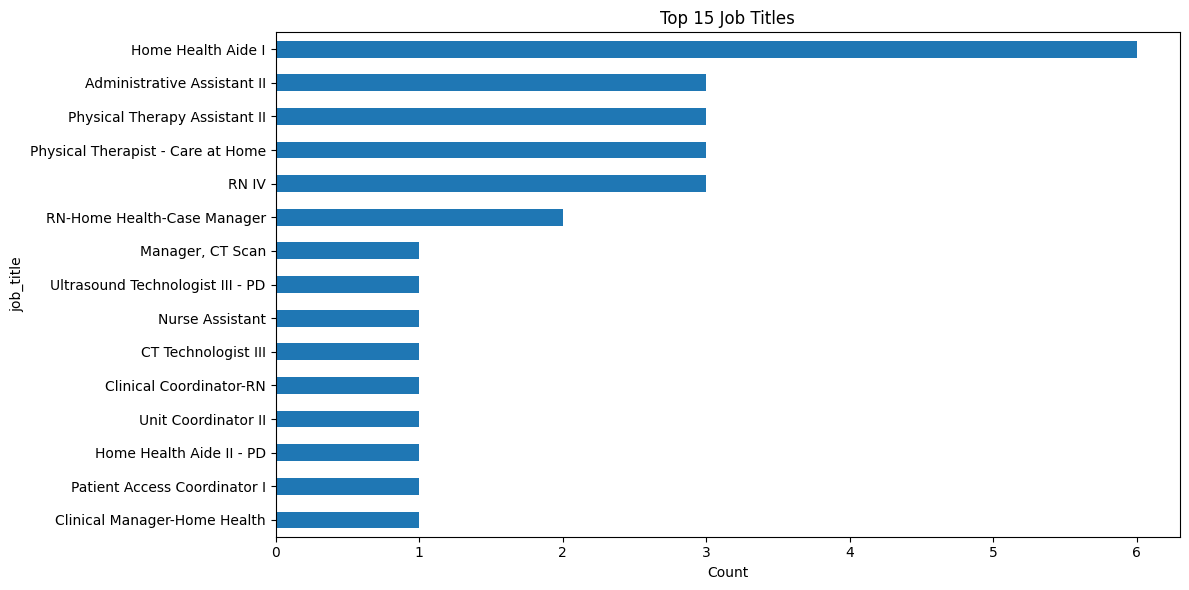

In [35]:
plt.figure(figsize=(12, 6))
job_counts.plot(kind='barh')
plt.title('Top 15 Job Titles')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [36]:
print("Timesheet Data Info:")
print(timesheet_df.info())
print("\n" + "="*50)
print("\nMissing values:")
print(timesheet_df.isnull().sum())

Timesheet Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 412571 entries, 0 to 412570
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   client_employee_id        412571 non-null  object 
 1   department_id             255388 non-null  object 
 2   department_name           256159 non-null  str    
 3   home_department_id        262593 non-null  object 
 4   home_department_name      262593 non-null  object 
 5   pay_code                  412571 non-null  str    
 6   punch_in_comment          412571 non-null  str    
 7   punch_out_comment         412571 non-null  str    
 8   hours_worked              412571 non-null  float64
 9   punch_apply_date          412571 non-null  str    
 10  punch_in_datetime         412571 non-null  str    
 11  punch_out_datetime        412571 non-null  str    
 12  scheduled_start_datetime  180116 non-null  object 
 13  scheduled_end_datetime    180116 n

In [37]:
datetime_cols = ['punch_in_datetime', 'punch_out_datetime', 'punch_apply_date']
for col in datetime_cols:
    if col in timesheet_df.columns:
        timesheet_df[col] = pd.to_datetime(timesheet_df[col], errors='coerce')

In [38]:
print("Hours Worked Statistics:")
print(timesheet_df['hours_worked'].describe())

Hours Worked Statistics:
count    412571.000000
mean          9.371894
std           2.457244
min           0.020000
25%           8.420000
50%           8.530000
75%          11.000000
max          32.500000
Name: hours_worked, dtype: float64


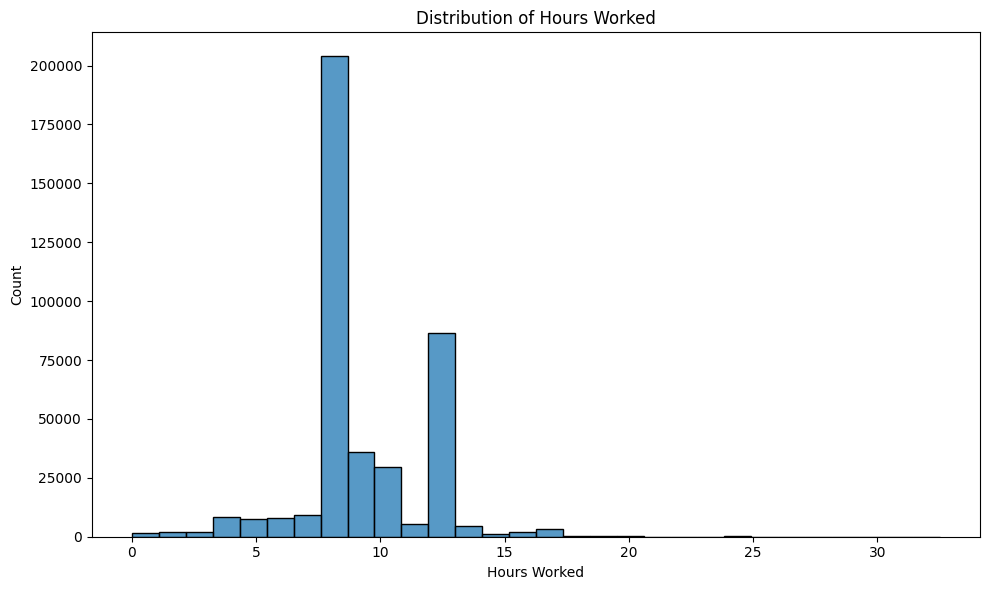

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(timesheet_df['hours_worked'], bins=30)
plt.title('Distribution of Hours Worked')
plt.xlabel('Hours Worked')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [40]:
pay_code_counts = timesheet_df['pay_code'].value_counts()
print("Pay Code Distribution:")
print(pay_code_counts)

Pay Code Distribution:
pay_code
normal_worked                            169692
Hourly                                   103990
TM-12 OT 50HP                             20498
PTO Scheduled TM                          18583
Exempt                                     9848
                                          ...  
SEIU 8|SEIU On Call                           1
MNA 10 50HP|Perm Evening                      1
Hourly|Perm Weekend Nite                      1
Hourly Temp Reassign|MNA Float 8 50HP         1
MNA Temp Reassign 8 50HP                      1
Name: count, Length: 727, dtype: int64


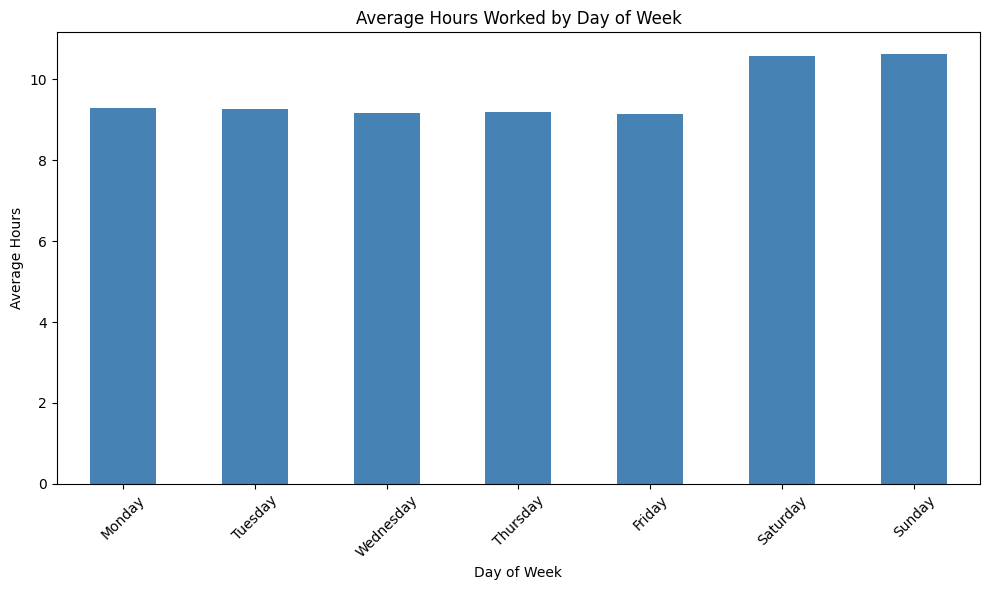

In [41]:
timesheet_df['day_of_week'] = timesheet_df['punch_apply_date'].dt.day_name()
hours_by_day = timesheet_df.groupby('day_of_week')['hours_worked'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours_by_day = hours_by_day.reindex(day_order)

plt.figure(figsize=(10, 6))
hours_by_day.plot(kind='bar', color='steelblue')
plt.title('Average Hours Worked by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Overtime analysis (>40 hours in a week)
overtime_shifts = timesheet_df[timesheet_df['hours_worked'] > 40]
print(f"Shifts with overtime (>40 hours): {len(overtime_shifts)} ({len(overtime_shifts)/len(timesheet_df)*100:.1f}%)")

# Average overtime hours
overtime_hours = overtime_shifts['hours_worked'].mean() - 40
print(f"Average overtime hours: {overtime_hours:.2f} hours")

## Data Quality Issues

In [ ]:
# Check for duplicate records
employee_dups = employee_df.duplicated().sum()
timesheet_dups = timesheet_df.duplicated().sum()
print(f"Duplicate employee records: {employee_dups}")
print(f"Duplicate timesheet records: {timesheet_dups}")

In [ ]:
# Check for employees in timesheet but not in employee master
timesheet_employees = set(timesheet_df['client_employee_id'].unique())
employee_ids = set(employee_df['client_employee_id'].unique())

missing_employees = timesheet_employees - employee_ids
print(f"Employees in timesheet but not in employee master: {len(missing_employees)}")
if missing_employees:
    print(f"Sample missing IDs: {list(missing_employees)[:5]}")

## Summary Statistics

In [ ]:
# Summary
summary = {
    'Total Employees': len(employee_df),
    'Active Employees': len(employee_df[employee_df['active_status'] == '1']),
    'Terminated Employees': len(employee_df[employee_df['active_status'] == '0']),
    'Total Timesheet Records': len(timesheet_df),
    'Unique Timesheet Employees': timesheet_df['client_employee_id'].nunique(),
    'Average Hours per Shift': timesheet_df['hours_worked'].mean(),
    'Total Organizations': employee_df['organization_name'].nunique(),
    'Total Departments': employee_df['department_name'].nunique(),
}

summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
print("Summary Statistics:")
print(summary_df.to_string(index=False))

In [ ]:
# Save summary to processed data
summary_df.to_csv(OUTPUT_DIR / 'summary_statistics.csv', index=False)
print(f"Summary saved to {OUTPUT_DIR / 'summary_statistics.csv'}")